# Quickstart
## Basic inference
The easiest way to get started is by using the {class}`~fastdfe.base_inference.BaseInference` class which infers the DFE from a single pair of frequency spectra, one neutral and one selected. In this example we create {class}`~fastdfe.spectrum.Spectrum` objects holding the SFS counts and pass them to {class}`~fastdfe.base_inference.BaseInference`. Note that we are required to specify the number of monomorphic sites (the last and first entries of the specified counts which correspond to the number of mono-allelic sites where the ancestral and derived allele is fixed, respectively).

In [3]:
setwd("/Users/au732936/PycharmProjects/fastDFE")
reticulate::use_condaenv("/Users/au732936/miniconda3/envs/dev-r-fastdfe", required = TRUE)
source("R/fastdfe.R")
fastdfe <- load_fastdfe()

In [ ]:
library(fastdfe)

# load the fastdfe package
fastdfe <- load_fastdfe()

In [5]:
# import classes
BaseInference <- fastdfe$BaseInference
Spectrum <- fastdfe$Spectrum

# configure inference
inf <- BaseInference(
  sfs_neut = Spectrum(c(177130, 997, 441, 228, 156, 117, 114, 83, 105, 109, 652)),
  sfs_sel = Spectrum(c(797939, 1329, 499, 265, 162, 104, 117, 90, 94, 119, 794))
)

# run inference
sfs_models <- BaseInference$run(inf)

fastDFE uses maximum likelihood estimation (MLE) to find the DFE. By default, 10 local optimization runs are carried out to make sure a reasonably good global optimum has been bound. The DFE furthermore needs to parametrized where {class}`~fastdfe.parametrization.GammaExpParametrization` is used by default.

We can now plot the inferred DFE in discretized form (cf. {func}`~fastdfe.base_inference.BaseInference.plot_discretized`).

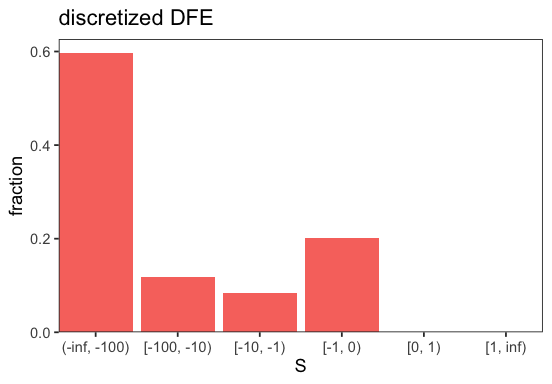

In [6]:
p <- BaseInference$plot_discretized(inf)

We can also plot a comparison of the (selected) modelled and observed SFS (cf. {func}`~fastdfe.base_inference.BaseInference.plot_sfs_comparison`).

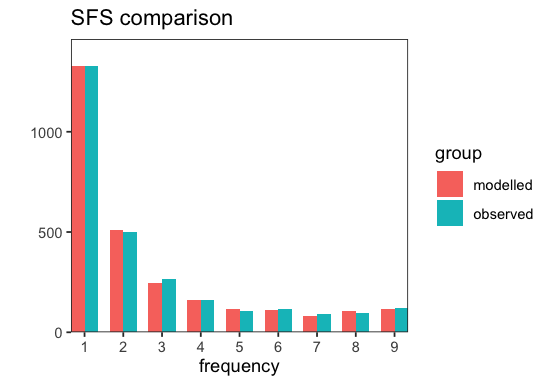

In [7]:
p <- BaseInference$plot_sfs_comparison(inf)

## Bootstrapping

We can perform parametric bootstrapping (cf. {func}`~fastdfe.base_inference.BaseInference.bootstrap`)

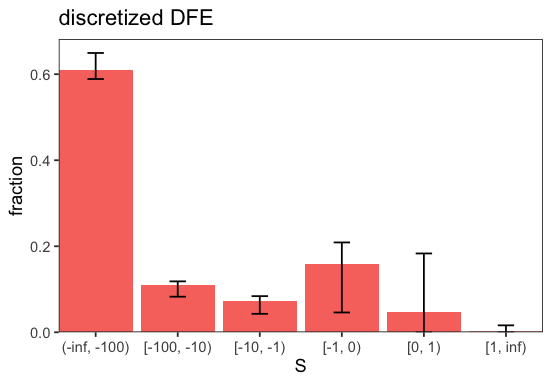

In [8]:
bs <- inf$bootstrap()

# redo the plotting
p <- BaseInference$plot_discretized(inf)

## Serialization

In [10]:
# save the inference object to the file
# we can unserialized the inference by using BaseInference.from_file
inf$to_file("out/serialized.json")

# alternatively we can also save a summary to file
inf$get_summary()$to_file("out/summary.json")